# ***________________________________________________________________________________________________________***

# **PROYECTO FINAL - INTRODUCCION A MACHINE LEARNING**


# *"ANÁLISIS DE DATOS DEL PRECIO DEL AGUACATE EN LOS ESTADOS UNIDOS"*


# **Autor:** JESUS ALBERTO ROSERO LOZANO

# ***________________________________________________________________________________________________________***

# **Contenido:**


**1) Entendimiento del Negocio.**

    a)Objetivos del Negocio y situacion Actual

    b)Metas del proyecto de machine learning

**2) Entendimiento de los Datos**

    a)Recoleccion Inicial de datos

    b)Descripcion de los Datos

    c)Exploracion de los datos

    d)Verificacion de la calidad de los datos
    

**3) Preparacion de los Datos**

    a)Seleccion y Limpieza de Datos



**4) Modelamiento**

    a) Selección de un modelo apropiado para el problema (supervisado o no supervisado).

    b) Diseño de experimentación (validación cruzada).

    c) Construcción y entrenamiento de los modelos.

**5) Evaluación**

    a) Definición de los criterios o métricas de evaluación.

    b) Análisis de los resultados.


# ***1) ENTENDIMIENTO DEL NEGOCIO***

# ***__________________________________________________________________________________________________***



**Objetivos del Negocio y situacion Actual:**

    En estados unidos existe un aplio consumo del aguacate, tambien conocido como avocado, lo cual como a cualquier producto, a dado lugar a la creacion de organizaciones en torno a la actividad comercial derivada del mismo, razon por la cual se toma muy en serio el seguimiento constante a las diferentes variedades, precios y volumenes transzados de este codiciado fruto verde.

    Por tal motivo es considerado muy importante el estudio de estos datos en torno a la venta del aguacate, toda ves que se pueda realizar un seguimiento minucioso al comportamiento del mercado, las cantidades producidas e incluso las cosechas a lo largo y ancho del Pais.


**Metas del proyecto de machine learning:**

    En este proyecyo buscaremos realizar predicciones en el precio de venta de los aguacates, para ello nos vamos a valer de un modelo predictivo que haga uso de la inteligencia artificial, para poder entregar informacion valiosa para gestionar mejor las cosechas y obtener el mejor beneficio posible a quienes lo comercian.


# ***2) ENTENDIMIENTO DE LOS DATOS***

# ***__________________________________________________________________________________________________***

**Recoleccion inicia de los datos:**

    Estos datos se descargaron del sitio web de Hass Avocado Board en mayo de 2018 y se compilaron en un solo CSV. Así es como la Junta del Aguacate Hass describe los datos en su sitio web: 
    
    http://www.hassavocadoboard.com/retail/volume-and-price-data

**Descripcion de los datos:**

    La siguiente tabla representa los datos de escaneo minorista semanales de 2018 para el volumen minorista nacional(USA)(unidades) y el precio. Los datos de escaneo minorista provienen directamente de las cajas registradoras de los minoristas en función de las ventas minoristas reales de aguacates Hass. A partir de 2013, la siguiente tabla refleja un conjunto ampliado de datos minoristas de múltiples puntos de venta. Los informes de múltiples puntos de venta incluyen una agregación de los siguientes canales: supermercado, masa, club, drogas, dólar y militar. El precio promedio (de los aguacates) en la tabla refleja un costo por unidad (por aguacate), incluso cuando se venden varias unidades (aguacates) en bolsas. Los códigos de búsqueda de productos (PLU) en la tabla son solo para aguacates Hass. No se incluyen en esta tabla otras variedades de aguacates (p. ej., piel verde).

Algunas columnas relevantes en el conjunto de datos:

**- Date** - La fecha de la observación

**- AveragePrice** - el precio promedio de un solo aguacate

**- type** - convencional u orgánico

**- year** - el año

**- Region** - la ciudad o región de la observación

**- Total Volume** - Número total de aguacates vendidos

**- 4046** - Número total de aguacates con PLU 4046 vendidos

**- 4225** - Número total de aguacates con PLU 4225 vendidos

**- 4770** - Número total de aguacates con PLU 4770 vendidos


Agradecimientos
¡¡Muchas gracias a la Junta del Aguacate Hass por compartir estos datos!!

http://www.hassavocadoboard.com/retail/volume-and-price-data

In [242]:
#Importamos librerías para trabajar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from scipy import stats
import scipy
import sklearn
import warnings
import plotly
import plotly.graph_objects as go
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn import metrics

warnings.simplefilter(action='ignore')
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
mpl.rcParams['figure.dpi'] = 105
mpl.rcParams['figure.figsize'] = (9, 7)

In [243]:
#VERSIONES
!python --version
print('Pandas', pd.__version__)
print('NumPy', np.__version__)
print('Matplotlib', mpl.__version__)
print('Seaborn', sns.__version__)

Python 3.8.3
Pandas 1.0.5
NumPy 1.18.5
Matplotlib 3.2.2
Seaborn 0.11.2


In [244]:
#CARGANDO EL ARCHIVOS CSV CON LOS DATOS
AVO_INICIAL = pd.read_csv('avocado.csv')
AVO_PRINCIPAL = AVO_INICIAL.copy()

In [245]:
AVO_PRINCIPAL.shape

(18249, 14)

**Exploracion de los datos:**
    
    Una vez realizado el cargue de los datos procedemos a realizar la exploración de los datos en nuestro dataframe, inicialmente visualizando sus primeras diez filas, posteriormente una muestra aleatoria del mismo tamaño y finalmente identificando cuantas filas y columnas lo componen.

    (18249 filas y 14 columnas)



In [246]:
AVO_PRINCIPAL.head(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany
5,5,2015-11-22,1.26,55979.78,1184.27,48067.99,43.61,6683.91,6556.47,127.44,0.0,conventional,2015,Albany
6,6,2015-11-15,0.99,83453.76,1368.92,73672.72,93.26,8318.86,8196.81,122.05,0.0,conventional,2015,Albany
7,7,2015-11-08,0.98,109428.33,703.75,101815.36,80.00,6829.22,6266.85,562.37,0.0,conventional,2015,Albany
8,8,2015-11-01,1.02,99811.42,1022.15,87315.57,85.34,11388.36,11104.53,283.83,0.0,conventional,2015,Albany
9,9,2015-10-25,1.07,74338.76,842.40,64757.44,113.00,8625.92,8061.47,564.45,0.0,conventional,2015,Albany


In [247]:
AVO_PRINCIPAL.sample(10)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1784,16,2015-09-06,1.12,114216.62,1158.99,78578.82,2074.97,32403.84,23118.99,9284.85,0.00,conventional,2015,Pittsburgh
17199,20,2017-08-13,1.85,76353.20,2129.87,17537.18,183.10,56503.05,56394.33,108.72,0.00,organic,2017,Southeast
17026,6,2017-11-19,2.03,27570.90,792.08,10568.84,38.64,16171.34,985.11,15159.04,27.19,organic,2017,Seattle
13509,16,2016-09-04,1.58,13039.44,1.00,231.39,0.00,12807.05,12807.05,0.00,0.00,organic,2016,NorthernNewEngland
9281,51,2015-01-04,1.29,19137.28,8040.64,6557.47,657.48,3881.69,3881.69,0.00,0.00,organic,2015,BaltimoreWashington
14043,30,2016-05-29,1.99,9333.72,1748.33,7197.21,0.00,388.18,388.18,0.00,0.00,organic,2016,Sacramento
6872,37,2017-04-16,1.22,100089.52,2109.81,47637.85,213.91,50127.95,18406.86,31705.47,15.62,conventional,2017,Louisville
14833,39,2017-04-02,1.26,16943.34,1252.51,6359.96,0.00,9330.87,636.10,8694.77,0.00,organic,2017,Atlanta
12682,21,2016-07-31,1.86,1853.41,885.09,214.99,0.00,753.33,753.33,0.00,0.00,organic,2016,GrandRapids
14235,14,2016-09-18,1.66,9465.99,479.32,3496.18,354.07,5136.42,3837.20,1299.22,0.00,organic,2016,SouthCarolina


**Verificacion de la Calidad de los datos:**

    Como podemos observar el conjunto de datos no posee datos nulos, sin embargo tiene una columna sin nombrar y para realizar algunos procedimientos posteriores muy seguramente será necesario realizar algunos ajustes.

In [248]:
AVO_PRINCIPAL.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [249]:
AVO_PRINCIPAL.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


In [250]:
# Función para visualizar un conjunto de datos de dos variables en un plano 2D.
def plot_data(X, y, model = None, ax = None, title=None):

    if ax is None:
      _, ax = plt.subplots(dpi = 110)

    if model is not None: 
      pred_fun = gen_pred_fun(model)
      plot_decision_region(X, pred_fun, ax)

    y_unique = np.unique(y)    
    df = pd.DataFrame({'x1': X[:,0], 'x2': X[:,1], 'Clases': y})
    sns.set_theme()
    sns.scatterplot(data = df, x = 'x1', y = 'x2', 
                    hue = 'Clases',style = 'Clases', ax = ax, palette = 'Set1').set_title(title)

In [251]:
# Función para visualizar la superficie de decisión de un clasificador.
def plot_decision_region(X, pred_fun, ax=None):
    min_x, max_x = np.min(X[:, 0]), np.max(X[:, 0])
    min_y, max_y = np.min(X[:, 1]), np.max(X[:, 1])
 
    min_x = min_x - (max_x - min_x) * 0.05
    max_x = max_x + (max_x - min_x) * 0.05
    min_y = min_y - (max_y - min_y) * 0.05
    max_y = max_y + (max_y - min_y) * 0.05

    x_vals = np.linspace(min_x, max_x, 100)
    y_vals = np.linspace(min_y, max_y, 100)

    XX, YY = np.meshgrid(x_vals, y_vals)
    grid_r, grid_c = XX.shape

    ZZ = np.zeros((grid_r, grid_c))

    for i in range(grid_r):
        for j in range(grid_c):
            ZZ[i, j] = pred_fun(XX[i, j], YY[i, j])    
    
    cs = ax.contourf(XX, YY, ZZ, 100, cmap = plt.cm.Pastel1, vmin = 0, vmax = np.max(ZZ)* 9. / (np.max(ZZ) + 1), alpha = 0.75)        
    ax.get_figure().colorbar(cs, ax=ax, )
    ax.set_xlabel("x")
    ax.set_ylabel("y")

In [252]:
#Función para generar la función de predicción de un clasificador entrenado previamente.
def gen_pred_fun(clf):
    def pred_fun(x1, x2):
        x = np.array([[x1, x2]])
        return clf.predict(x)[0]
    return pred_fun

In [253]:
# Gráficar la predicción de los datos de temperatura.

def plot_prediction(params, ys, test_date_index): 
  
  train_data = AVO_TIME.loc[:test_date_index[0]]
  _y_test, _y_forward, _y_last = ys
  # Graficamos los valores predichos.
  fig = go.Figure(layout = dict(
       title = f'<b>Precio estimado por unidad del aguacate (2015-2018)</b> <br> {params}',
       dragmode= 'pan', width = 1200, height = 600))
  
  fig.add_trace(go.Scatter(x = train_data.index,  # Datos originales hasta la primer semana predicha. (fechas)
                          y = train_data.values, # Datos originales hasta la primer semana predicha. (temperaturas)
                          mode = 'lines',
                          name = 'Valores de entrenamiento y pruebas'))

  #Gráfica de los valores de prueba reales.
  fig.add_trace(go.Scatter(x = test_date_index,
                          y = _y_test,
                          mode='lines+markers',
                          name='Valores reales (y)'))


  #Gráfica de los valores predichos a partir de las ventanas de X_test.
  fig.add_trace(go.Scatter(x = test_date_index, 
                          y = _y_forward,
                          mode = 'lines+markers',
                          name = 'Valores predichos a partir de datos reales'))

  #Gráfica de los valores predichos a partir de ventanas creadas proceduralmente.
  fig.add_trace(go.Scatter(x = test_date_index,
                          y = _y_last,
                          mode='lines+markers',
                          name='Valores predichos a partir de datos predichos'))

  fig.show(config = dict({'scrollZoom': True})) 

# ***3) PREPARACION  DE LOS DATOS***

# ***__________________________________________________________________________________________________***

***Seleccion y limpieza de datos***

Para nuestro proyecto nos vamos a centrar en la prediccion del precio estimado del aguacate por unidad, en el tiempo, es decir tomaremos las siguientes caracteristicas:

-   Date
-   AveragePrice

corresponden a las columnas 1 y 2 respectivamente

In [205]:
# Objeto Series con el conjunto de datos.

AVO_TIME = AVO_PRINCIPAL.iloc[:,[1,2]]
#AVO_TIME = AVO_TIME.sort_values('Date')
AVO_TIME.set_index('Date',inplace=True)
AVO_TIME = pd.Series( data= AVO_TIME.iloc[:,0])


In [206]:
# Información general del contenido de la serie.
AVO_TIME.describe()

count    18249.000000
mean         1.405978
std          0.402677
min          0.440000
25%          1.100000
50%          1.370000
75%          1.660000
max          3.250000
Name: AveragePrice, dtype: float64

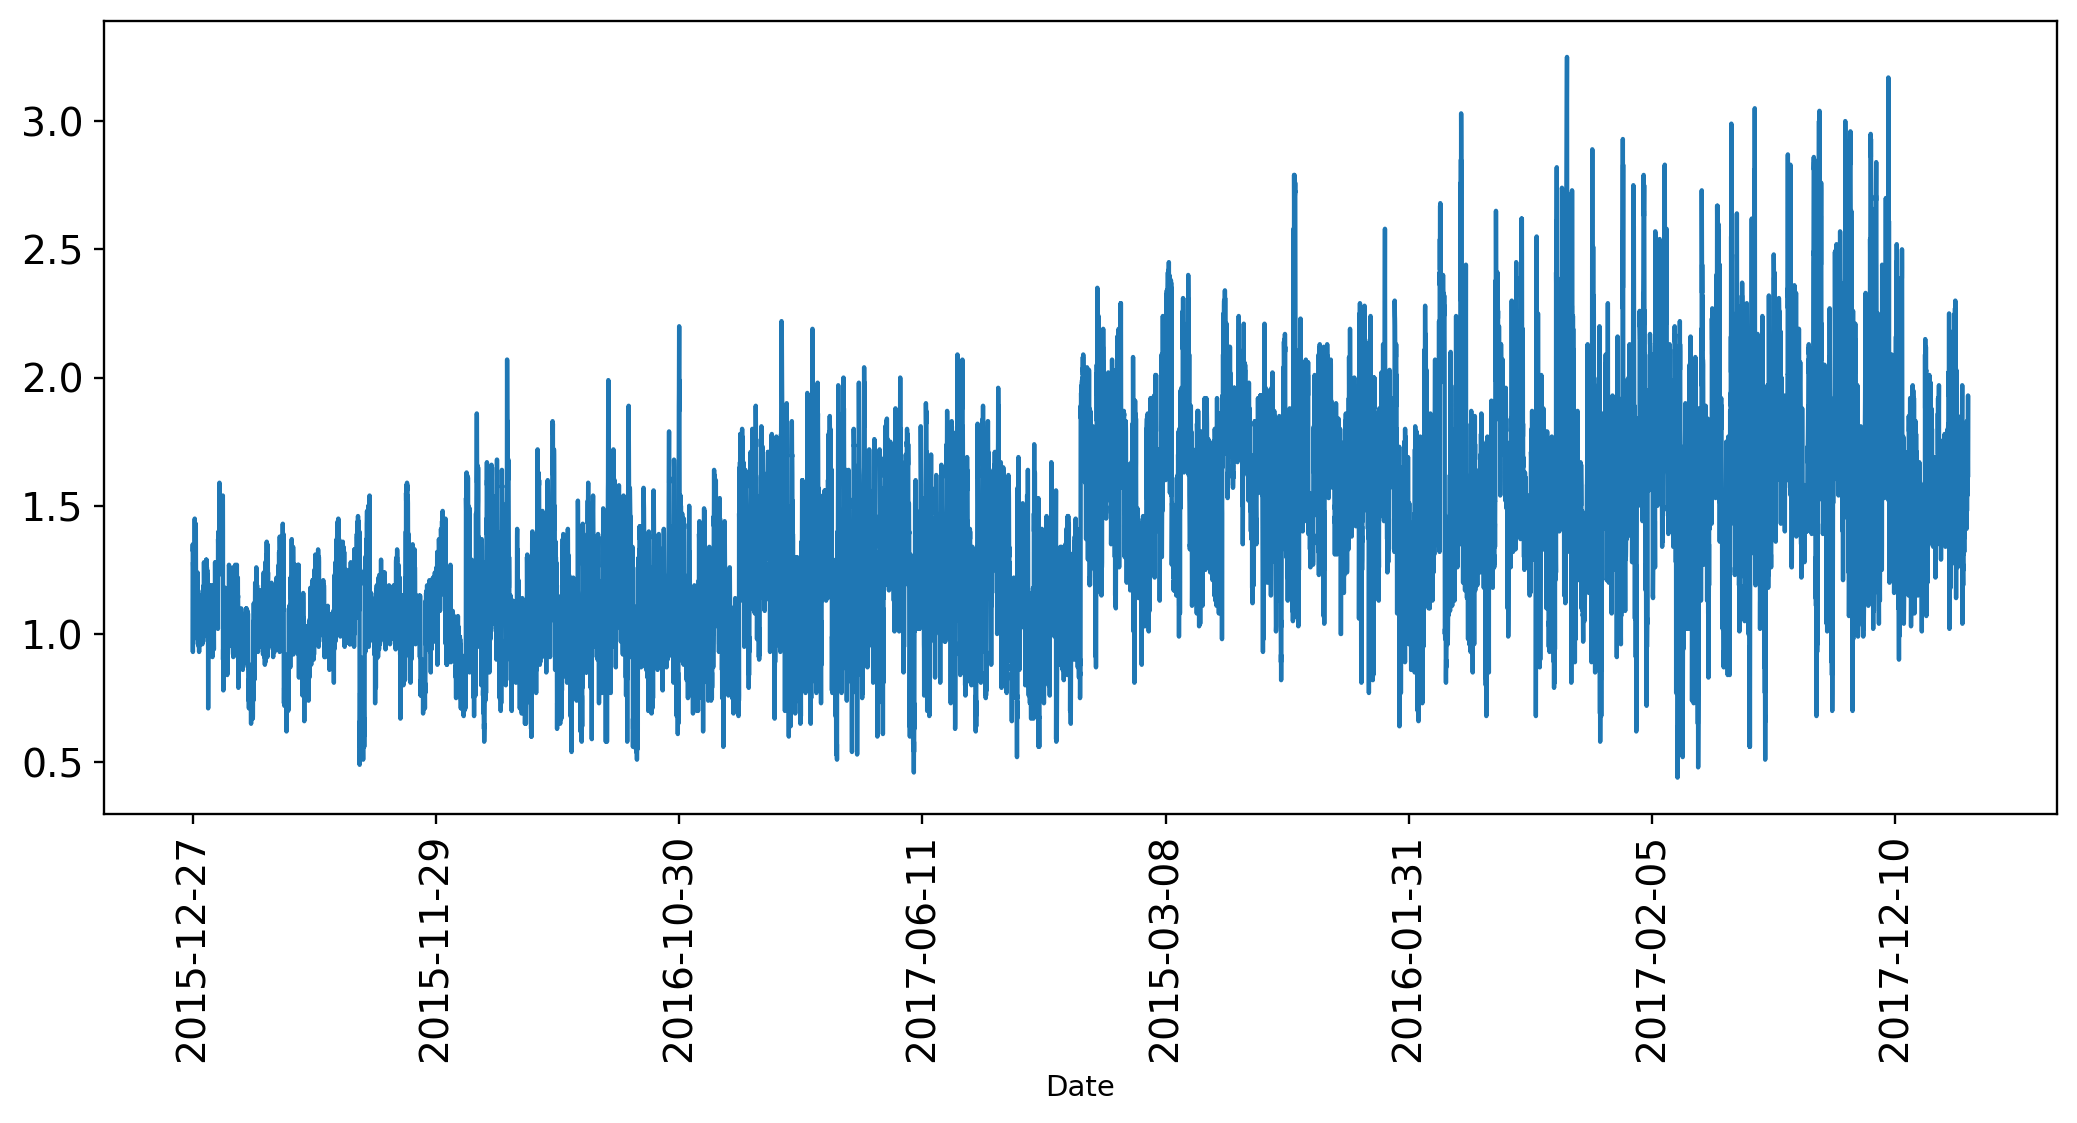

In [207]:
AVO_TIME.plot(rot=90, figsize = (12, 5), fontsize = 13.5);

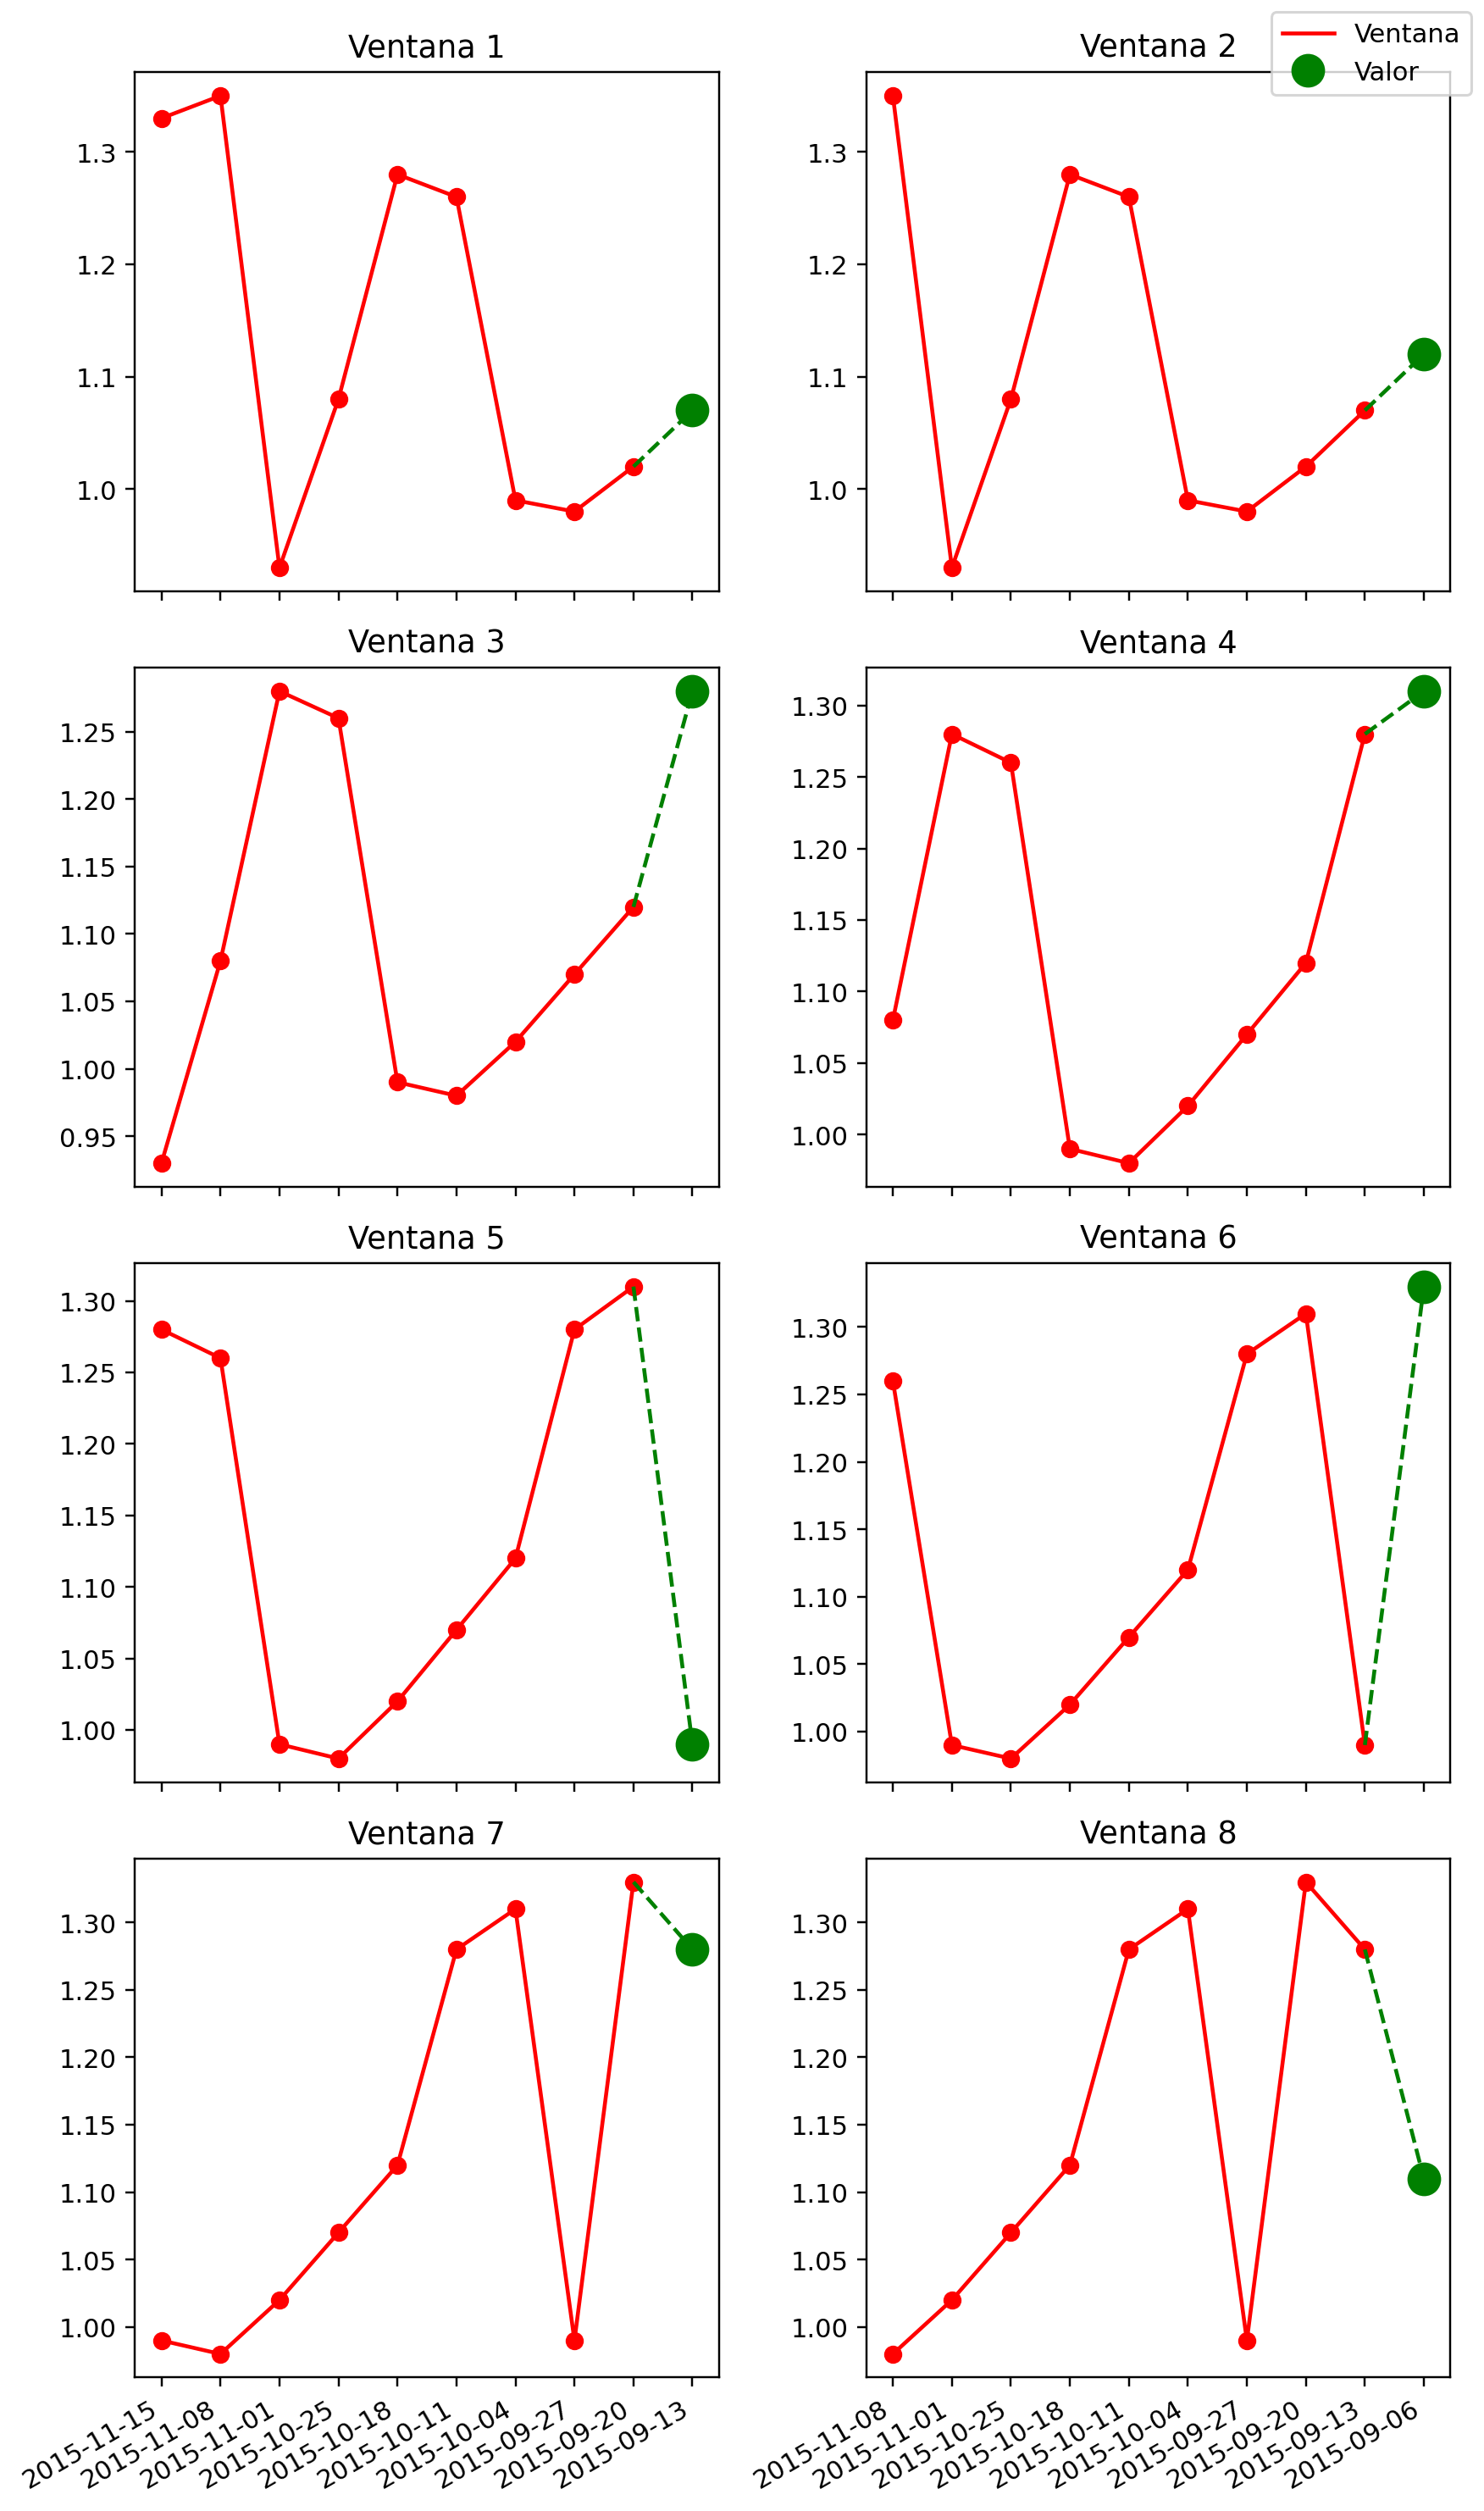

In [208]:
#@markdown **Visualización:** demostración del concepto de ventanas de tiempo.

#@markdown * **`n`**: Número de ventanas a visualizar.
n =   9#@param {type:"integer"}
#Visualización del concepto de ventana

#@markdown * **`k`**: Tamaño de la ventana.
k =   10#@param {type:"integer"}

fig, axes = plt.subplots(nrows = n//2, ncols= 2,  figsize = (8, 1.5*n), dpi = 110)

for i, ax in enumerate(axes.flat):  
  data =  AVO_TIME.iloc[i: i + k]
  ax.set_title(f'Ventana {i + 1}')
  ax.plot(data.index[:-1], data.values[:-1], 'r')
  ax.plot(data.index[-1], data.values[-1], 'go', ms = 12)  
  ax.plot(data.index[:-1], data.values[:-1], 'ro')
  ax.plot(data.index[-2:], data.values[-2:], 'g--')
  fig.autofmt_xdate()
fig.tight_layout()

fig.legend(['Ventana', 'Valor']);

# ***4) MODELAMIENTO***

# ***__________________________________________________________________________________________________***

***Seleccion Del modelo***

Para nuestro proyecto nos vamos a utilizar un modelo de series de tiempo con redes neuronales artificiales, especificamente "Regresión de series de tiempo con perceptrón multicapa", con el cual buscaremos predecir los precios futuros del aguacate en el tiempo.



In [209]:
# Tamaño de la ventana. Puede cambiarlo si lo desea.
# Tenga en cuenta que el entrenamiento para valores mayores tardará más tiempo.

k = 20

In [210]:
AVO_TIME = AVO_PRINCIPAL.iloc[:,[1,2]]
AVO_TIME = AVO_TIME.sort_values('Date')
AVO_TIME.set_index('Date',inplace=True)
AVO_TIME = pd.Series( data= AVO_TIME.iloc[:,0])

data_train = AVO_TIME.loc[:'2017-11-19']  # final del set entrenamiento
data_test  = AVO_TIME.loc['2017-11-26':]  # comienzo del set de pruebas

data_train.index[-1], data_test.index[0] # Fechas de inicio de ambos conjuntos.



('2017-11-19', '2017-11-26')

In [211]:
# Función para obtener las ventanas de tiempo.

def sliding_time(ts, window_size=1):

  n = ts.shape[0] - window_size  
  X = np.empty((n, window_size))
  y = np.empty(n)

  for i in range(window_size, ts.shape[0]):   
    y[i - window_size] = ts[i]
    X[i- window_size, 0:window_size] = np.array(ts[i - window_size:i])
    
  return X, y

In [212]:
# Creamos las ventanas y sus valores a predecir para entrenamiento y validación.

X_train, y_train = sliding_time(data_train.values, window_size=k) 

In [213]:
print(f"Número de ejemplos de entrenamiento: {X_train.shape[0]} (Ventana de tamaño {X_train.shape[1]})")
print(f"Número de valores a predecir: {y_train.shape[0]}")

Número de ejemplos de entrenamiento: 16285 (Ventana de tamaño 20)
Número de valores a predecir: 16285


In [214]:
X_test, y_test = sliding_time(data_test.values, window_size=k) 

In [215]:
print(f"Número de ejemplos de entrenamiento: {X_test.shape[0]} (Ventana de tamaño {X_test.shape[1]})")
print(f"Número de valores a predecir: {y_test.shape[0]}")

Número de ejemplos de entrenamiento: 1924 (Ventana de tamaño 20)
Número de valores a predecir: 1924


In [216]:
# Observaciones de X en formato de DataFrame.
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,1.75,1.49,1.68,1.52,1.64,0.75,0.85,1.50,1.00,0.80,0.74,1.82,1.01,1.80,1.81,1.15,1.72,1.56,1.05,1.02
1,1.49,1.68,1.52,1.64,0.75,0.85,1.50,1.00,0.80,0.74,1.82,1.01,1.80,1.81,1.15,1.72,1.56,1.05,1.02,1.19
2,1.68,1.52,1.64,0.75,0.85,1.50,1.00,0.80,0.74,1.82,1.01,1.80,1.81,1.15,1.72,1.56,1.05,1.02,1.19,1.00
3,1.52,1.64,0.75,0.85,1.50,1.00,0.80,0.74,1.82,1.01,1.80,1.81,1.15,1.72,1.56,1.05,1.02,1.19,1.00,1.79
4,1.64,0.75,0.85,1.50,1.00,0.80,0.74,1.82,1.01,1.80,1.81,1.15,1.72,1.56,1.05,1.02,1.19,1.00,1.79,1.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16280,1.85,1.53,1.21,2.32,1.42,2.17,1.86,2.07,1.27,1.12,1.37,1.21,0.60,1.81,1.13,1.50,1.08,1.54,1.45,1.90
16281,1.53,1.21,2.32,1.42,2.17,1.86,2.07,1.27,1.12,1.37,1.21,0.60,1.81,1.13,1.50,1.08,1.54,1.45,1.90,1.62
16282,1.21,2.32,1.42,2.17,1.86,2.07,1.27,1.12,1.37,1.21,0.60,1.81,1.13,1.50,1.08,1.54,1.45,1.90,1.62,1.47
16283,2.32,1.42,2.17,1.86,2.07,1.27,1.12,1.37,1.21,0.60,1.81,1.13,1.50,1.08,1.54,1.45,1.90,1.62,1.47,1.64


In [217]:
# Valores a predecir y en formato de Series.
pd.Series(y_train)

0        1.19
1        1.00
2        1.79
3        1.22
4        1.01
         ... 
16280    1.62
16281    1.47
16282    1.64
16283    1.37
16284    1.82
Length: 16285, dtype: float64

### **Partición de los datos de entrenamiento y pruebas**
---

Como se mencionó previamente, para realizar la partición de entrenamiento y pruebas se debe tomar en cuenta la temporalidad de la serie. Para ello utilizaremos la función **`TimeSeriesSplit`** de *Scikit-Learn*.

In [218]:
# Selección de los datos en series de tiempo
from sklearn.model_selection import TimeSeriesSplit

# Definimos el número de splits para realizar cross-validation
tsp = TimeSeriesSplit(n_splits=3)

EL método **`TimeSeriesSplit`** toma como parámetro los arreglos **`X`** y **`y`** y genera los índices para entrenamiento y pruebas de una validación cruzada de _**forward chaining**_ igual a la cantidad de divisiones definidas en el argumento **`n_splits`**. 

In [219]:
for i, (train_index, test_index) in enumerate(tsp.split(X_train, y_train)):
    
  print(f'-------------------- Pliegue {i + 1} --------------------')
  print("\tPartición de entrenamiento")
  print(f'\t\tTamaño de la partición: {train_index.shape}')
  print(f'\t\tRango de valores: {train_index[0]}-{train_index[-1]}\n')

  print("\tPartición de validación")
  print(f'\t\tTamaño de la partición: {test_index.shape}')
  print(f'\t\tRango de valores: {test_index[0]}-{test_index[-1]}\n')  

-------------------- Pliegue 1 --------------------
	Partición de entrenamiento
		Tamaño de la partición: (4072,)
		Rango de valores: 0-4071

	Partición de validación
		Tamaño de la partición: (4071,)
		Rango de valores: 4072-8142

-------------------- Pliegue 2 --------------------
	Partición de entrenamiento
		Tamaño de la partición: (8143,)
		Rango de valores: 0-8142

	Partición de validación
		Tamaño de la partición: (4071,)
		Rango de valores: 8143-12213

-------------------- Pliegue 3 --------------------
	Partición de entrenamiento
		Tamaño de la partición: (12214,)
		Rango de valores: 0-12213

	Partición de validación
		Tamaño de la partición: (4071,)
		Rango de valores: 12214-16284



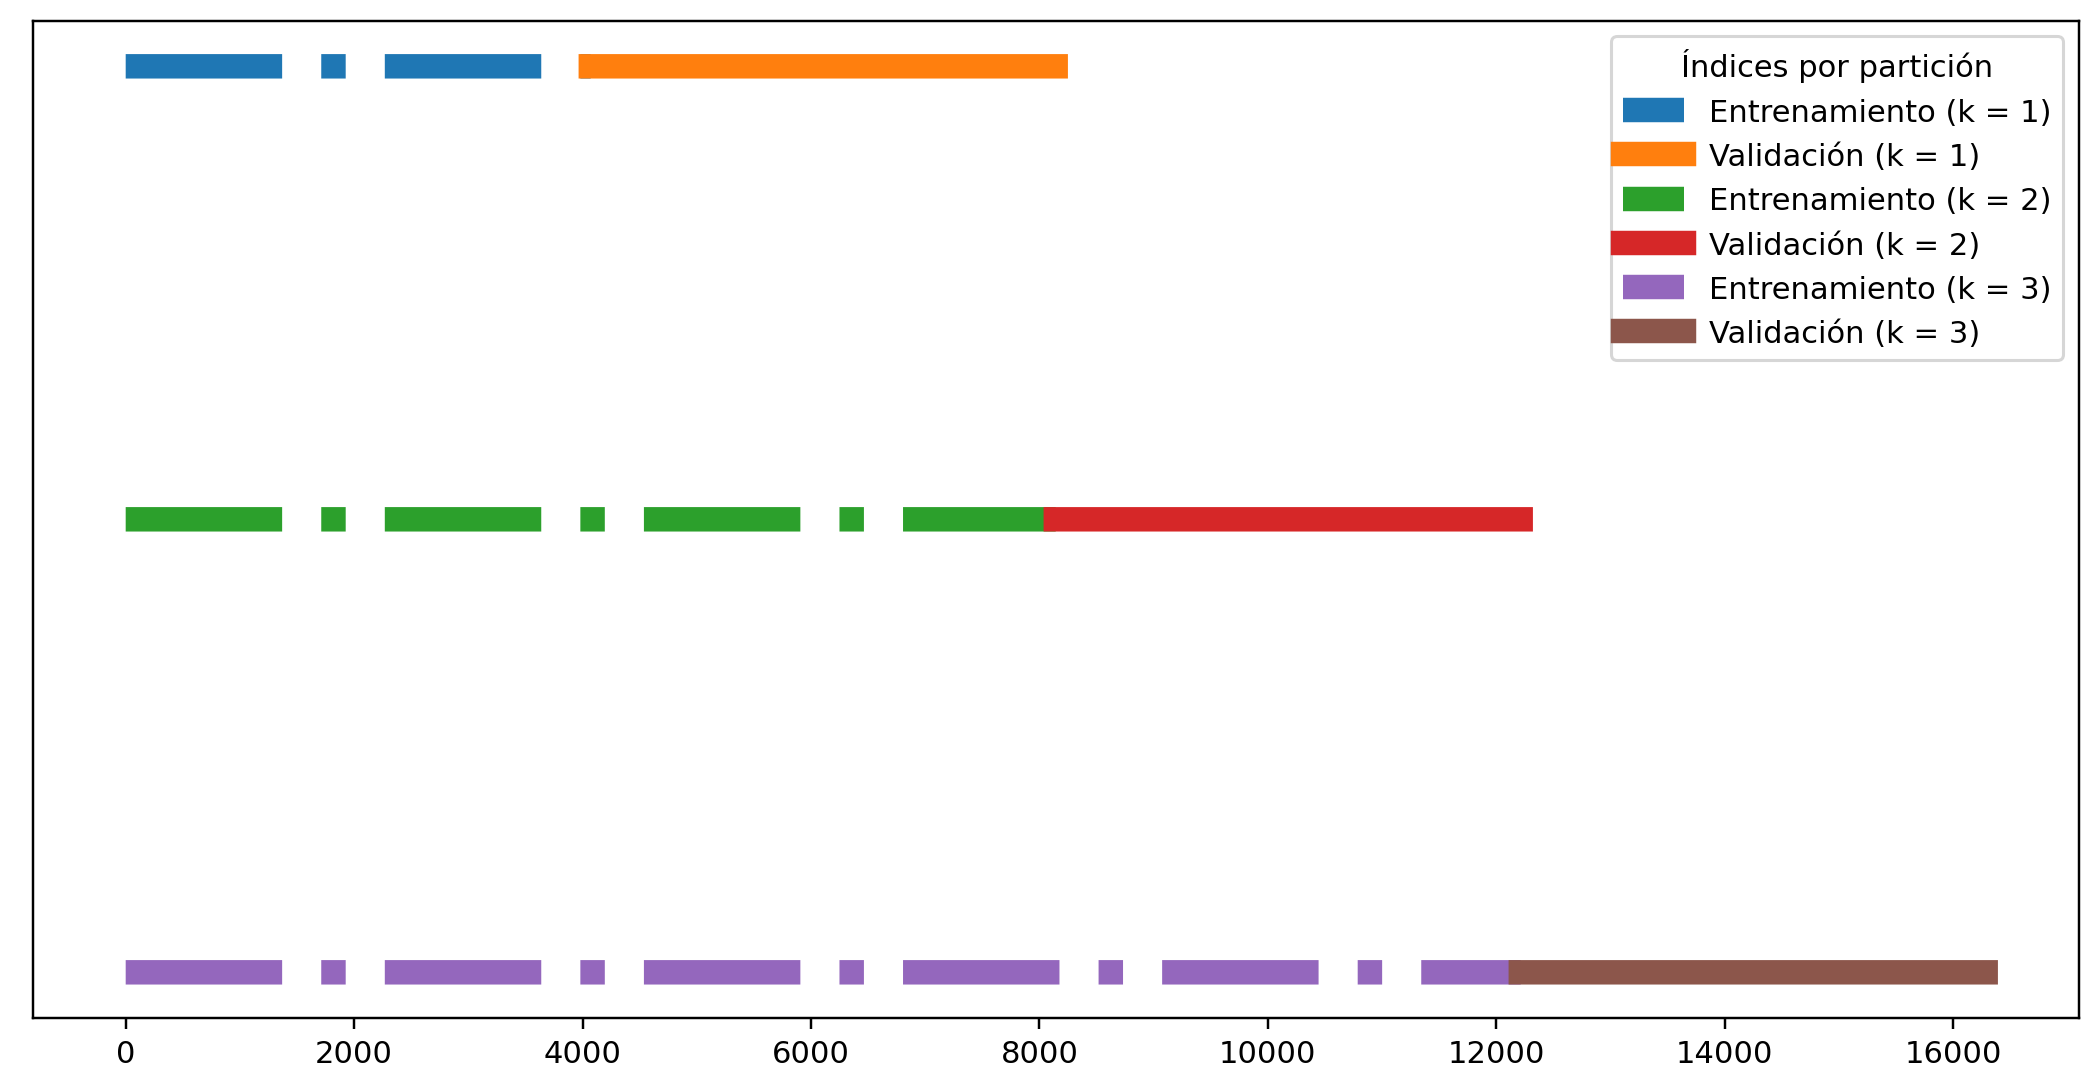

In [220]:
#@markdown **Visualización:** demostración de la ubicación de los índices de la partición de series de tiempo con **`TimeSeriesSplit`**.


n_splits = 3 #@param {type:"slider", min:3, max:7, step:1}

# La partición nos devuelve los indices de train y test.
tsp = TimeSeriesSplit(n_splits=n_splits)

i = 0
fig = plt.figure(figsize = (12,6), dpi = 110)
plt.set_cmap('Paired')

tsp_indexes = [(train_index, test_index) for (train_index, test_index) in tsp.split(X_train, y_train)]

for train_index, test_index in tsp_indexes:
  plt.plot(train_index, 
           np.full(len(train_index), 1-i*0.001),
           lw = 8, 
           ls= '-.', 
           label = f'Entrenamiento (k = {i + 1})')
  
  plt.plot(test_index, 
           np.full(len(test_index), 1-i*0.001), 
           lw = 8, 
           ls= '-', 
           label = f'Validación (k = {i + 1})')
  i+=1
fig.get_axes()[0].get_yaxis().set_visible(False)
plt.legend(ncol=1, title = 'Índices por partición', );

Visualizamos los datos de entrenamiento y validación de esta última división:

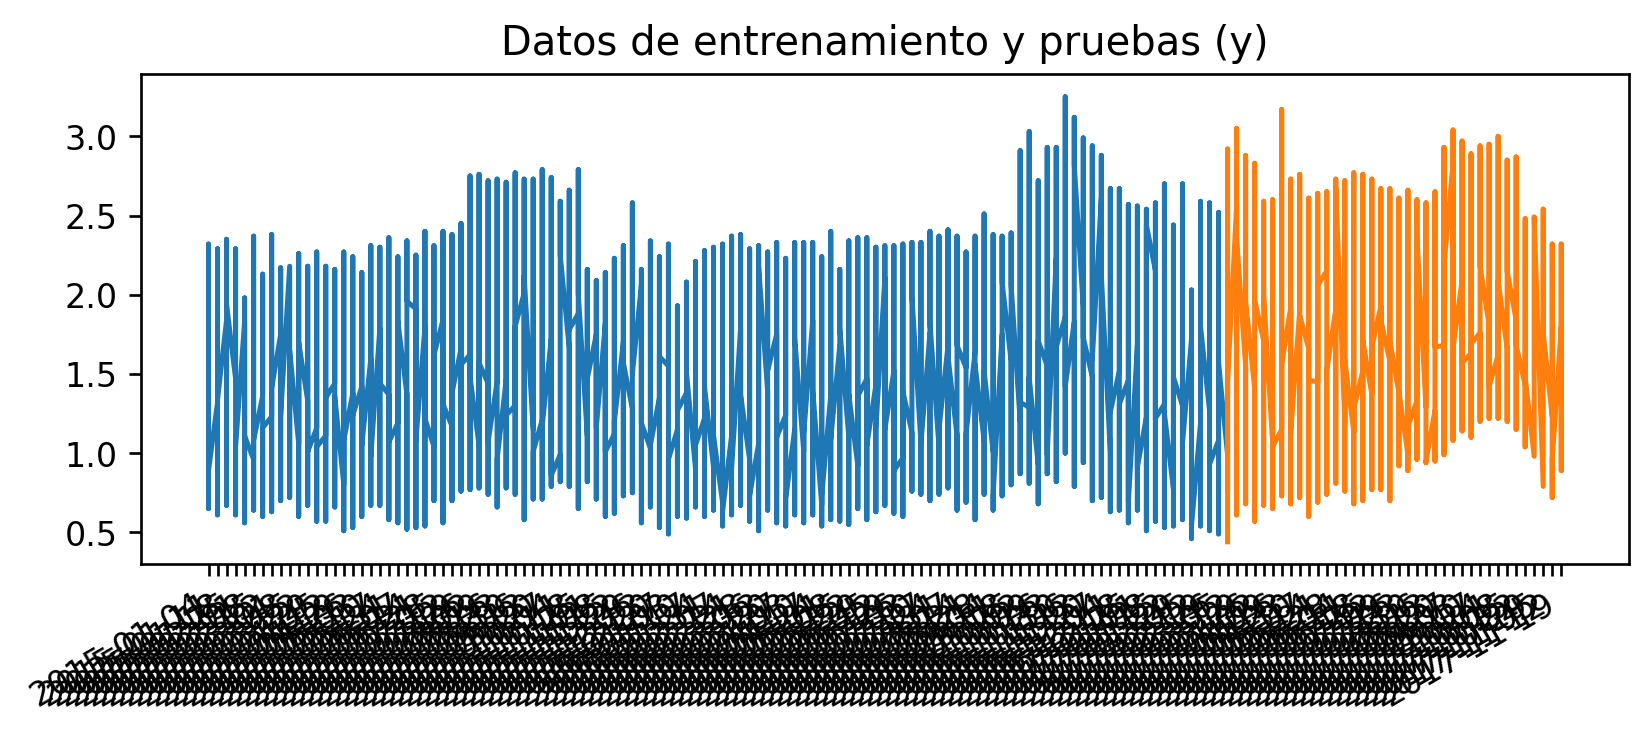

In [221]:
# Datos de prueba y entrenamiento con Matplotlib
train_index, test_index = tsp_indexes[-1]

fig = plt.figure(dpi = 120, figsize = (8, 3))
plt.plot(AVO_TIME[train_index].index, AVO_TIME[train_index].values, label = "Entrenamiento (y)")
plt.plot(AVO_TIME[test_index].index, AVO_TIME[test_index].values, label = "Prueba (y)")

plt.title('Datos de entrenamiento y pruebas (y)')
fig.autofmt_xdate()

## **Regresión de series de tiempo con perceptrón multicapa**
---
Ahora realizamos la regresión con una red neuronal multicapa, para predecir el valor de la serie. En esta ocasión utilizaremos **`MPLRegressor`**. Sus parámetros son equivalentes a los aceptados por **`MLPClassifier`**, a diferencia que el regresor permite retornar los valores continuos generados por la función de predicción.

In [222]:
from sklearn.neural_network import MLPRegressor 

model = MLPRegressor(solver = 'lbfgs',
                   activation = 'relu',
                   hidden_layer_sizes=(120, 60, 30),
                   max_iter=200,                   
                   n_iter_no_change=50, 
                   validation_fraction=0.2,               
                   random_state=1234)

In [223]:
# Entrenamos el modelo.
model.fit(X_train, y_train)

MLPRegressor(hidden_layer_sizes=(120, 60, 30), n_iter_no_change=50,
             random_state=1234, solver='lbfgs', validation_fraction=0.2)

In [224]:
# Métricas de rendimiento
# Error absoluto, cuadrado, y cuadrado logarítmico.
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error 

y_pred = model.predict(X_test)

print(f"Test Mean Squared Error: \t{mean_squared_error(y_test, y_pred):.4f}")
print(f"Test Mean Absolute Error: \t{mean_absolute_error(y_test, y_pred):.4f}")
print(f"Test Mean squared log error: \t{mean_squared_log_error(y_test, y_pred):.4f}")

Test Mean Squared Error: 	0.0959
Test Mean Absolute Error: 	0.2510
Test Mean squared log error: 	0.0178


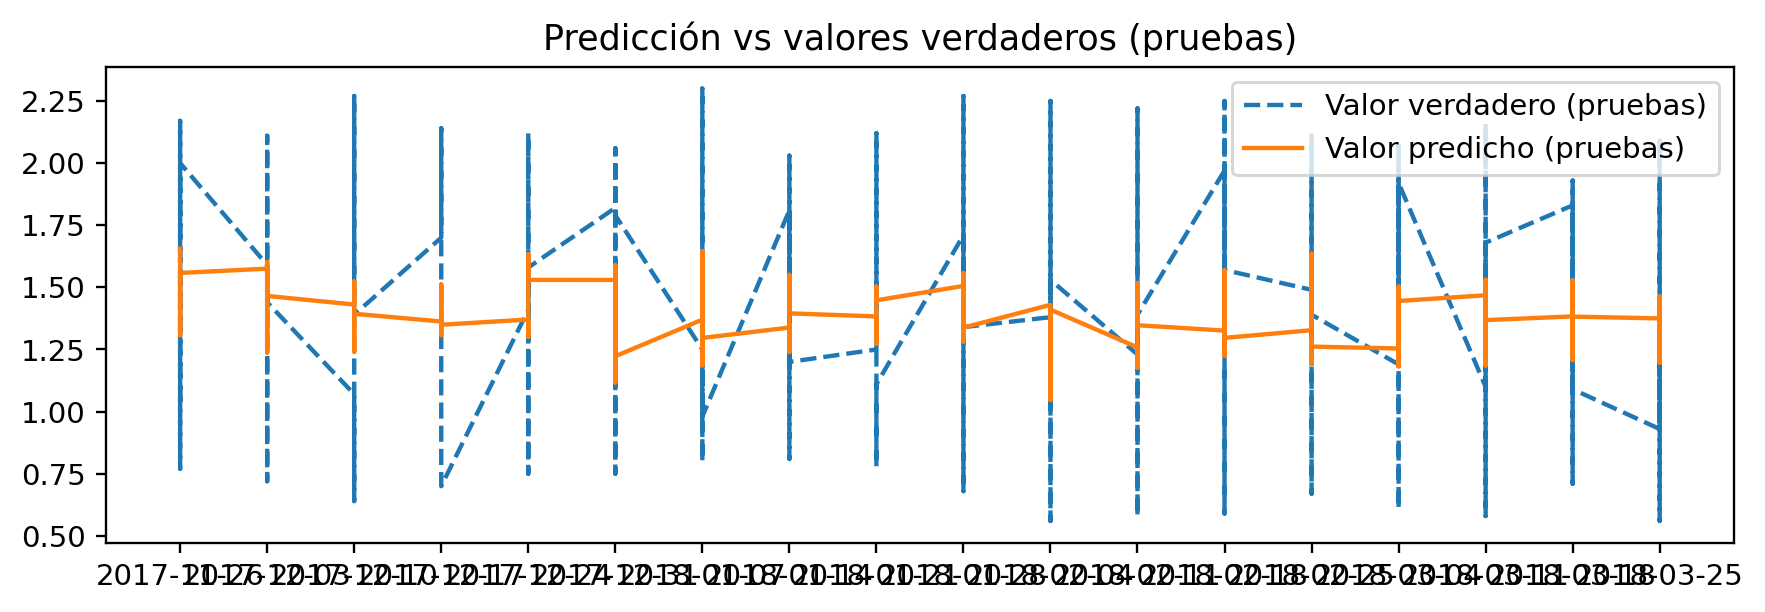

In [225]:
x = data_test.index[k:]

plt.figure(figsize=(10,3), dpi = 105)
plt.plot(x, y_test, ls = "--", label="Valor verdadero (pruebas)")
plt.plot(x, y_pred, ls = '-', label="Valor predicho (pruebas)")
plt.title("Predicción vs valores verdaderos (pruebas)")
plt.legend();

### **Validación cruzada con series de tiempo**
---
Ahora vamos a explorar los hiperparámetros de la red para identificar sus valores más apropiados. Para hacer esto, utilizaremos todas las particiones generadas por **`TimeSeriesSplit`** y exploraremos manualmente las combinaciones de hiperparámetros de **`MLPRegressor`**.

En este ejemplo exploraremos el tamaño de la capa oculta (**`hidden_layer_sizes`**) y la función de activación (**`activation`**).

In [226]:
params = {    
      'hidden_layer_sizes' : [(20,), (40,), (80,) ], # Algunas arquitecturas propuestas.
      'activation' : ['logistic', 'relu']           # Funciones de activación.
 }

El objeto generado por **`TimeSeriesSplit`** puede ser usado para generar las particiones de validación cruzada con el método **`GridSearchCV`**, pasándolo con el argumento **`cv`**.

> **Nota**: La búsqueda explora $6$ configuraciones distintas en cada uno de los $5$ pliegues generados  con **`TimeSeriesSplit`**. Como consecuencia la función puede tardar unos minutos en ejecutarse por completo.

In [227]:
#Grid Search para el modelo MLPRegressor
from sklearn.model_selection import GridSearchCV

tsp = TimeSeriesSplit(n_splits = 5)

gsearch = GridSearchCV(estimator = MLPRegressor(solver = 'lbfgs', #Modelo  a explorar.          
                                                random_state=1234,
                                                max_iter= 2000,
                                                n_iter_no_change=50, 
                                                validation_fraction=0.2), 
                        cv = tsp,
                        param_grid = params, 
                        verbose = 3)

gsearch.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END activation=logistic, hidden_layer_sizes=(20,);, score=-0.014 total time=   0.3s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(20,);, score=-0.093 total time=   0.3s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(20,);, score=0.006 total time=   0.6s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(20,);, score=0.056 total time=   0.8s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(20,);, score=-0.037 total time=   1.0s
[CV 1/5] END activation=logistic, hidden_layer_sizes=(40,);, score=-0.013 total time=   0.6s
[CV 2/5] END activation=logistic, hidden_layer_sizes=(40,);, score=-0.105 total time=   0.5s
[CV 3/5] END activation=logistic, hidden_layer_sizes=(40,);, score=0.007 total time=   1.2s
[CV 4/5] END activation=logistic, hidden_layer_sizes=(40,);, score=0.056 total time=   1.6s
[CV 5/5] END activation=logistic, hidden_layer_sizes=(40,);, score=-0.033 total time=   3.6s
[CV 1/5] END a

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=5, test_size=None),
             estimator=MLPRegressor(max_iter=2000, n_iter_no_change=50,
                                    random_state=1234, solver='lbfgs',
                                    validation_fraction=0.2),
             param_grid={'activation': ['logistic', 'relu'],
                         'hidden_layer_sizes': [(20,), (40,), (80,)]},
             verbose=3)

# ***5) EVALUACION***

# ***__________________________________________________________________________________________________***

***Metricas de Evaluacion***    

    Ahora, podemos explorar el objeto generado en busca de la mejor configuración identificada, en el encontramos cifras que nos indican la efectividad de las distintas configuraciones.

In [228]:
# Los mejores 10 modelos con respecto a su mean_test_score.
pd.DataFrame(gsearch.cv_results_).nlargest(10, 'mean_test_score')

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_hidden_layer_sizes,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,1.334382,0.491375,0.019587,0.006244,logistic,"(80,)","{'activation': 'logistic', 'hidden_layer_sizes...",-0.013367,-0.099387,0.007779,0.055964,-0.018184,-0.013439,0.050352,1
0,0.681782,0.267197,0.007594,0.001854,logistic,"(20,)","{'activation': 'logistic', 'hidden_layer_sizes...",-0.013540,-0.092634,0.006229,0.055925,-0.037024,-0.016209,0.048965,2
1,1.541253,1.032809,0.063160,0.106371,logistic,"(40,)","{'activation': 'logistic', 'hidden_layer_sizes...",-0.013090,-0.104732,0.006775,0.056152,-0.032524,-0.017484,0.052666,3
3,16.808663,9.840978,0.002198,0.000400,relu,"(20,)","{'activation': 'relu', 'hidden_layer_sizes': (...",-0.076806,-0.215217,-0.008143,0.035273,-0.007668,-0.054512,0.088010,4
4,49.740012,23.583612,0.003596,0.001199,relu,"(40,)","{'activation': 'relu', 'hidden_layer_sizes': (...",-0.260170,-0.229850,-0.061127,-0.062969,-0.040787,-0.130981,0.093920,5
5,100.526580,47.467691,0.007393,0.002867,relu,"(80,)","{'activation': 'relu', 'hidden_layer_sizes': (...",-0.529937,-0.373936,-0.120662,-0.063998,-0.034144,-0.224535,0.194114,6


Finalmente, para la evaluación del modelo en la tarea de predecir instancias futuras, podemos retroalimentar los datos predichos en nuevas ventanas que se usen para predecir datos totalmente generados por el modelo.

A continuación, vamos a realizar este proceso desde la primera ventana del conjunto de evaluación, y comparar los resultados con los valores obtenidos al predecir a partir de las ventanas de evaluación y con los datos reales.

 Las líneas generadas en la visualización tienen el siguiente significado:
  * **Valores de entrenamiento y pruebas**: La primera ventana de tiempo
      (<font color="blue"><b>en azul</b></font>) corresponde a los datos que fueron usados para entrenar y validar el desempeño del modelo. A partir de su último valor se realizan las predicciones correspondientes.
  * **Valores reales**: Esta línea (<font color="red"><b>en rojo</b></font>) corresponde a los valores reales de la ventana de tiempo final en el conjunto de datos original. Se visualiza para realizar una comparación gráfica con los valores predichos por el modelo.
  * **Valores predichos a partir de datos reales**: Esta línea (<font color="green"><b>en verde</b></font>) corresponde a los valores predichos por el modelo a partir de la ventana previa de valores reales, aunque su final no coincida con el valor predicho con la ventana inmediatamente anterior.
  * **Valores predichos a partir de datos predichos**: Esta línea (<font color="BlueViolet"><b>en azul</b></font>) corresponde a los valores predichos por el modelo a partir de la ventana previa de valores construida a partir de predicciones continuas. Al inicio se realiza una predicción con los valores reales del final de la primera ventana de tiempo y se concatena el valor predicho al final de la nueva ventana usada para predecir. Gracias a esta configuración se podría realizar teóricamente una lista de predicciones sin límite.

In [254]:
X_last = X_test[:1]

# Listas con los datos en y, empezando desde el primer valor de pruebas.
y_last = [] 
y_forward = []

for i in range(len(X_test)):  
  # Valores predichos a partir de datos reales (X_test)
  y_pred_forward = gsearch.predict(X_test[i: i + 1]) 
  y_forward.append(y_pred_forward[0])  

  # Valores predichos a partir de datos predichos y retroalimentados.
  y_pred_last = gsearch.predict(X_last)  # Se predice el valor siguiente a partir de datos predichos previamente.
  y_last.append(y_pred_last[0])          # Guardamos el valor predicho.

  # Creación de la nueva ventana añadiendo la última predicción.
  X_last = np.roll(X_last, -1)           # Desplazamos todos los valores hacia la izquierda con np.roll
  X_last[0,-1] = y_pred_last             # Guardamos el valor predicho en la última posición del arreglo.

#Gráficamos las 2 predicciones distintas en comparación con los valores reales.

AVO_TIME = AVO_PRINCIPAL.iloc[:,[1,2]]
AVO_TIME = AVO_TIME.sort_values('Date')
AVO_TIME.set_index('Date',inplace=True)
AVO_TIME = pd.Series( data= AVO_TIME.iloc[:,0])
test_date_index = data_test.index[k:]
plot_prediction(gsearch.best_params_, 
                (y_test, y_forward, y_last),
                 test_date_index)

***Analisis de los Resultados***    

    Si buen logramos realizar un experimiento con multiples configuraciones, los resultados finales utilizando este modelo tienen un sabor agridulce, siendo que la tasa de prediccion tiene un margen de mejora bastante amplio, si tenemos en cuenta valores predichos a partir de datos predichos nos queda un comportamiento casi lineal que se aleja del comportamiento mas volatil de los datos posteriores.

    pero si vamos a los valores predichos a partir de datos reales las cosas mejoran un poco, teniendo un comportamiento mas parecido a lo observado previamente.

    definitivamente hay mucho por mejorar como realizar pruebas con otros modelos o bien afinar mejor los parametros en la validacion con el fin de lograr configuraciones con resultados mas eficacez a la hora de predecir este indicador.